基本的なKerasでの学習のフロー

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime

In [3]:
# Load tensorboard.notebook extension
%load_ext tensorboard

In [18]:
# 動作設定
SET_LEARNING = True # 学習するかどうか(True:学習する、False:チェックポイントから読み出す)

In [14]:
# データの準備
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# モデルの準備
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# コールバックの設定

# チェックポイント
checkpoint_path = './checkpoint/cp.ckpt'
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 period=1)
# earlystopping
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=0)

# tensorboard
log_dir='./logs/' + datetime.datetime.now().strftime("%Y%m%d%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Epoch 1/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.0637 - accuracy: 0.9793
Epoch 00001: saving model to ./checkpoint/cp.ckpt
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0641 - accuracy: 0.9792
Epoch 2/5
1859/1875 [============================>.] - ETA: 0s - loss: 0.0580 - accuracy: 0.9810
Epoch 00002: saving model to ./checkpoint/cp.ckpt
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0580 - accuracy: 0.9810
Epoch 3/5
1860/1875 [============================>.] - ETA: 0s - loss: 0.0524 - accuracy: 0.9824
Epoch 00003: saving model to ./checkpoint/cp.ckpt
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0523 - accuracy: 0.9824
Epoch 4/5
1859/1875 [============================>.] - ETA: 0s - loss: 0.0474 - accuracy: 0.9836
Epoch 00004: saving model to ./checkpoint/cp.ckpt
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0475 - accuracy: 0.9836
Epoch 5/5
1867/1875 [===========================

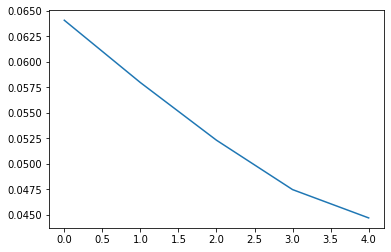

In [19]:
# train
if SET_LEARNING == True:
    history = model.fit(x_train, y_train, epochs=5, callbacks=[cp_callback,earlystopping,tensorboard_callback])

    plt.plot(history.history['loss'])
    plt.show()

else:
    checkpoint_dir = './checkpoint'
    latest = tf.train.latest_checkpoint(checkpoint_dir)
    model.load_weights(latest)

In [20]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0708 - accuracy: 0.9803


[0.07083962112665176, 0.9803000092506409]

In [7]:
%tensorboard --logdir './logs'